## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Your Name : Batı Erk Yılmaz

In [132]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
BaseYear = 1966

year = np.matrix(df_arac.Year).T - BaseYear

def fitPolynomialAndDisplayResultsForAssignment1(degree,x,y,title):
    A = np.hstack((np.power(x,i) for i in range(degree+1)))
    xx = np.matrix(np.linspace(0,54)).T
    A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

    w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

    f = A2*w_ls
    plt.plot(x+BaseYear, y, 'o-')
    plt.plot(xx+BaseYear, f, 'x-')

    plt.xlabel('Years')
    plt.ylabel('Number of' + title)

    print('\n {0} - Polynomial ({1}rd degree) Line Fitting'.format(title,degree))

    plt.show() 

    print('\n')

    for i in range(5):
        print('Estimated count of {0} in {1} is {2}'.format(title,i+2016,int(round(f.item(i+45)* 100000,0))))
    return


 All Vehicles - Polynomial (3rd degree) Line Fitting


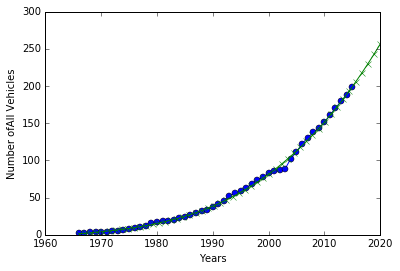



Estimated count of All Vehicles in 2016 is 20525549
Estimated count of All Vehicles in 2017 is 21724662
Estimated count of All Vehicles in 2018 is 22971918
Estimated count of All Vehicles in 2019 is 24268322
Estimated count of All Vehicles in 2020 is 25614875


In [134]:
allVehicles = np.matrix(df_arac.All).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(3,year,allVehicles,"All Vehicles")


 Car - Polynomial (3rd degree) Line Fitting


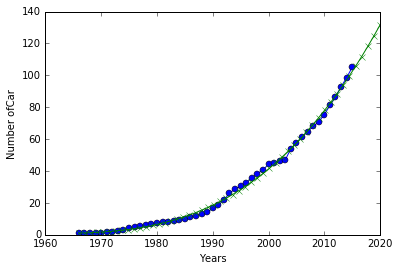



Estimated count of Car in 2016 is 10565910
Estimated count of Car in 2017 is 11181340
Estimated count of Car in 2018 is 11820338
Estimated count of Car in 2019 is 12483344
Estimated count of Car in 2020 is 13170800


In [104]:
car = np.matrix(df_arac.Car).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(3,year,car,"Car")


 Minibus - Polynomial (3rd degree) Line Fitting


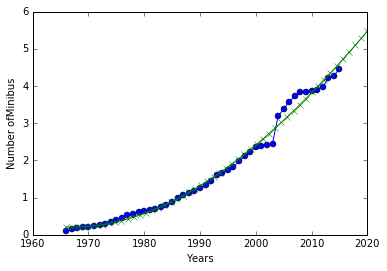



Estimated count of Minibus in 2016 is 471488
Estimated count of Minibus in 2017 is 490093
Estimated count of Minibus in 2018 is 508973
Estimated count of Minibus in 2019 is 528122
Estimated count of Minibus in 2020 is 547534


In [106]:
minibus = np.matrix(df_arac.Minibus).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(3,year,minibus,"Minibus")



 Bus - Polynomial (3rd degree) Line Fitting


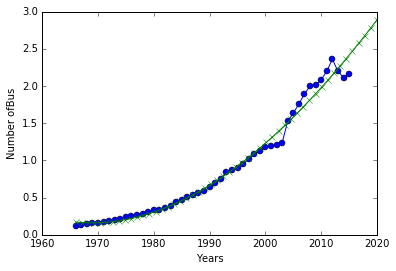



Estimated count of Bus in 2016 is 246914
Estimated count of Bus in 2017 is 257153
Estimated count of Bus in 2018 is 267576
Estimated count of Bus in 2019 is 278179
Estimated count of Bus in 2020 is 288960


In [107]:
bus = np.matrix(df_arac.Bus).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(3,year,bus,"Bus")


 Truck - Polynomial (3rd degree) Line Fitting


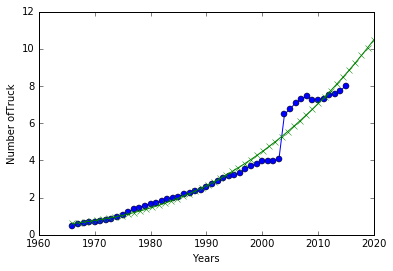



Estimated count of Truck in 2016 is 885264
Estimated count of Truck in 2017 is 924202
Estimated count of Truck in 2018 is 964276
Estimated count of Truck in 2019 is 1005501
Estimated count of Truck in 2020 is 1047893


In [108]:
truck= np.matrix(df_arac.Truck).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(3,year,truck,"Truck")


 Motorcycle - Polynomial (3rd degree) Line Fitting


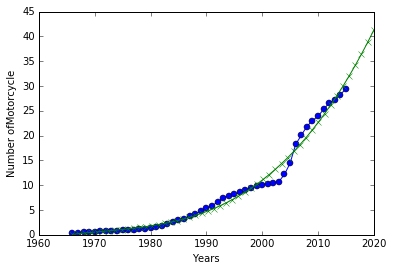



Estimated count of Motorcycle in 2016 is 3203211
Estimated count of Motorcycle in 2017 is 3417905
Estimated count of Motorcycle in 2018 is 3642628
Estimated count of Motorcycle in 2019 is 3877621
Estimated count of Motorcycle in 2020 is 4123126


In [109]:
motorcycle = np.matrix(df_arac.Motorcycle).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(3,year,motorcycle,"Motorcycle")


 Special Vehicles - Polynomial (5rd degree) Line Fitting


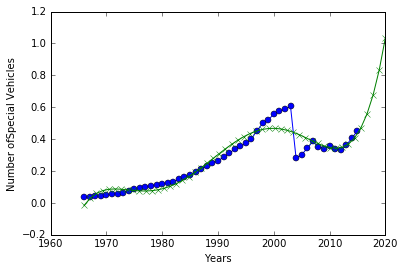



Estimated count of Special Vehicles in 2016 is 46935
Estimated count of Special Vehicles in 2017 is 55677
Estimated count of Special Vehicles in 2018 is 67637
Estimated count of Special Vehicles in 2019 is 83394
Estimated count of Special Vehicles in 2020 is 103585


In [113]:
special = np.matrix(df_arac.SpecialVehicles).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(5,year,special,"Special Vehicles")


 Machinery - Polynomial (4rd degree) Line Fitting


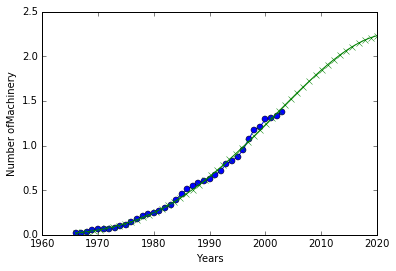



Estimated count of Machinery in 2016 is 210824
Estimated count of Machinery in 2017 is 214738
Estimated count of Machinery in 2018 is 218108
Estimated count of Machinery in 2019 is 220881
Estimated count of Machinery in 2020 is 223003


In [114]:
machinery = np.matrix(df_arac.Machinery[0:38]).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(4,year[0:38],machinery,"Machinery")



 Tractor - Polynomial (4rd degree) Line Fitting


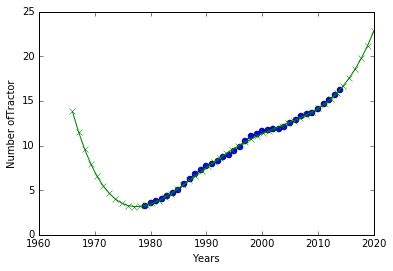



Estimated count of Tractor in 2016 is 1754899
Estimated count of Tractor in 2017 is 1859074
Estimated count of Tractor in 2018 is 1980041
Estimated count of Tractor in 2019 is 2119911
Estimated count of Tractor in 2020 is 2280902


In [115]:
tractor = np.matrix(df_arac.Tractor[13:-1]).T/100000.
fitPolynomialAndDisplayResultsForAssignment1(4,year[13:-1],tractor,"Tractor")


